### Diabetes Prediction using Decision Tree Regressor

In [62]:
from sklearn.datasets import load_diabetes

In [63]:
dataset = load_diabetes()

In [64]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
 df_diabetes = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [67]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [68]:
X= df_diabetes
y = dataset['target']

In [69]:
from sklearn.model_selection import train_test_split


In [70]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [71]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


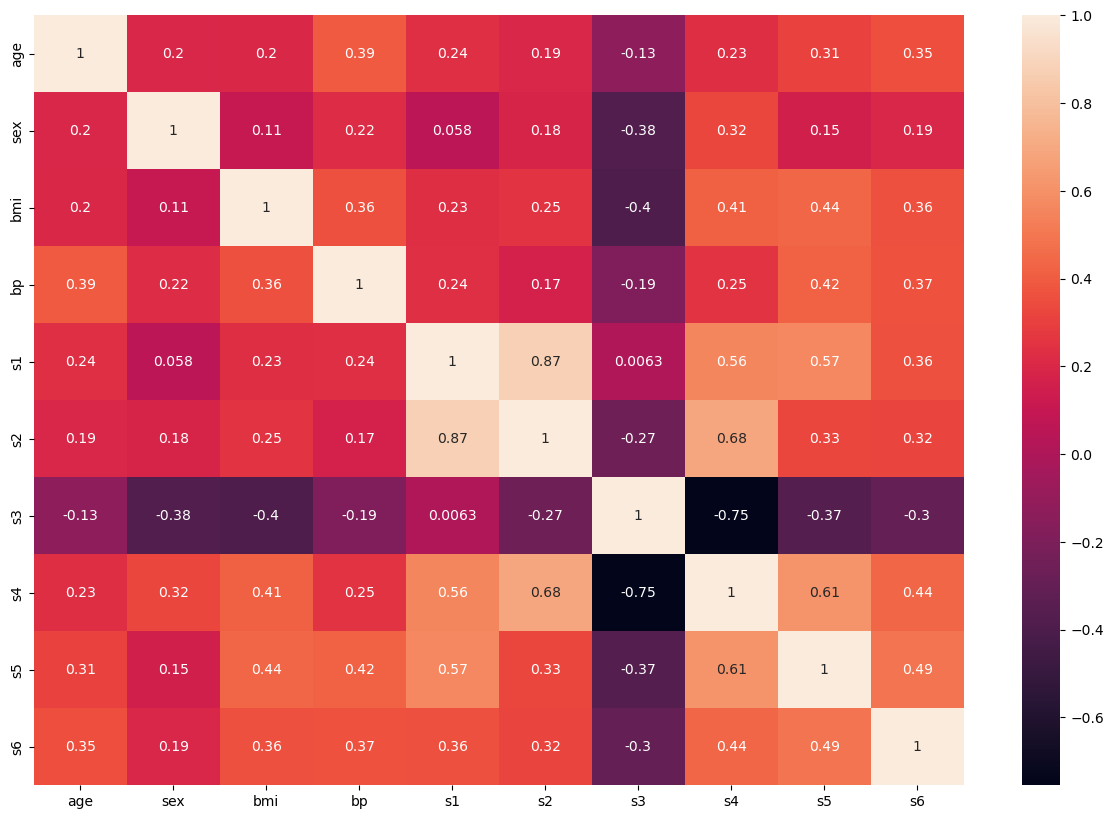

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)


DecisionTreeRegressor()

## HperParameter Tunning

In [74]:
param_grid ={
    'criterion':['squared_error','friedman_mse','absolute-error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,20,25],
    'max_features':['auto','sqrt','log2']
}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
cv = GridSearchCV(estimator=reg,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

In [77]:
cv.fit(X_train,y_train)

d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\programming\Machine Learning, Data Science by Krish Naik\myenv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\programming\Machine Learning, Data Science by Kri

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute-error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [79]:
cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [80]:
cv.best_score_

-3786.9499097379353

In [81]:
y_pred = cv.predict(X_test)

In [83]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [85]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.2989318144723122
53.00075252233147
4436.128893209247


In [86]:
model = DecisionTreeRegressor(criterion= 'squared_error',
 max_depth= 3,
 max_features= 'log2',
 splitter= 'best')

In [87]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2')

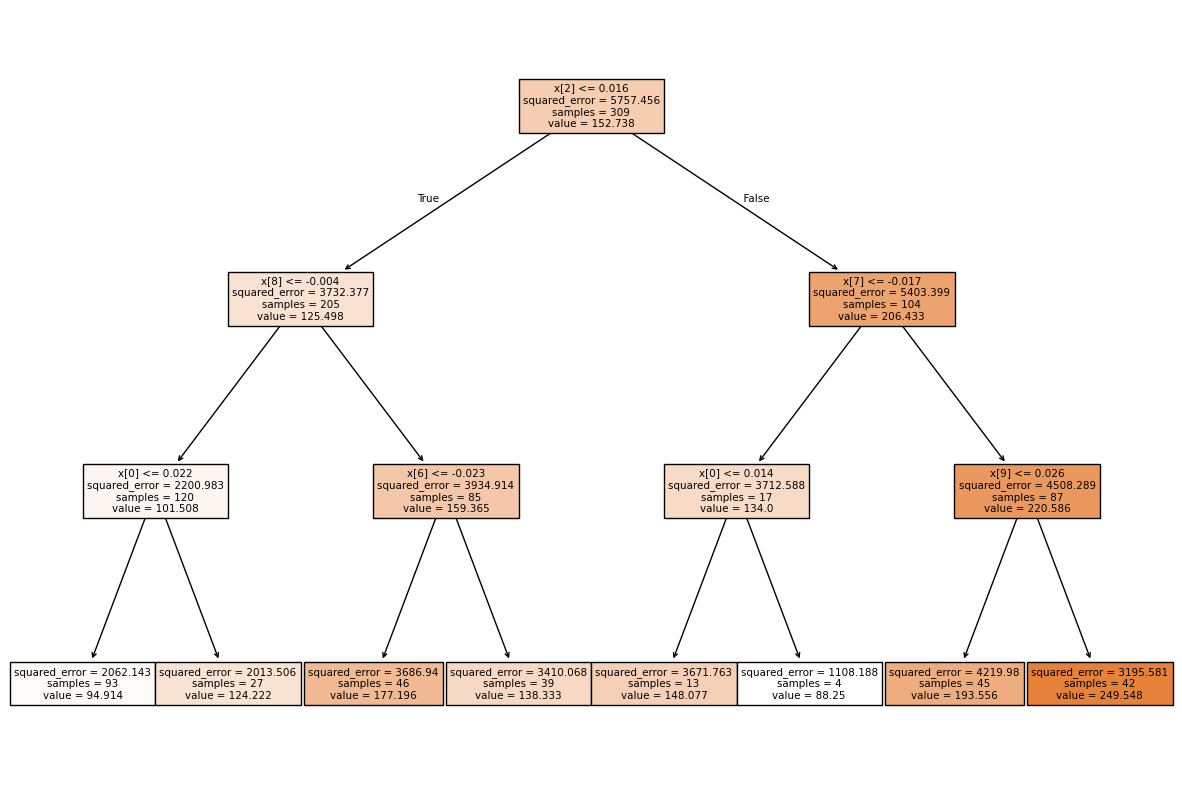

In [88]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()